In [1]:
from cdt.independence.graph import Glasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy.linalg as la
from sklearn.covariance import EmpiricalCovariance, graphical_lasso, GraphicalLassoCV
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import networkx as nx
import matplotlib.pyplot as plt

Detecting 1 CUDA devices.


In [2]:
with open('data/data_fill.pkl','rb') as f:
    data_fill_list = pickle.load(f)

    

In [3]:
## Glasso
emp = EmpiricalCovariance()
mrfs_list = []
lambda_list = []
## Do lambda search on each and choose best
for data_fill in tqdm_notebook(data_fill_list):
    emp.fit(data_fill)
    cov = emp.covariance_
    ## Use CV to find best
    gcv = GraphicalLassoCV(cv = 3, alphas = 20)
    gcv.fit(data_fill.values)
    ind_best = gcv.grid_scores_.mean(1).argmax()
    lambda_best = gcv.cv_alphas_[ind_best]
    gl = Glasso()
    graph = gl.predict(data_fill, alpha = lambda_best)
    mrf = nx.adjacency_matrix(graph).todense()
    mrfs_list.append(mrf)
    lambda_list.append(lambda_best)

graphical_lasso: did not converge after 100 iteration: dual gap: -1.754e-04
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
graphical_lasso: did not converge after 2000 iteration: dual gap: -1.435e-04
invalid value encountered in multiply
invalid value encountered in multiply
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
invalid value encountered in multiply
invalid value encountered in multiply
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to '

Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.


In [4]:
lambda_list

[0.00043163344765013203,
 0.0003881836458753304,
 0.0004281641971722109,
 0.00041478525100599613,
 0.0003510040384788285,
 0.0008174359427550247,
 0.0006459065397757844,
 0.0003226304572870879,
 0.0003620051920471542,
 0.0006540362246050728]

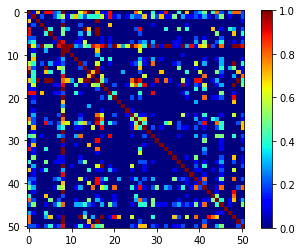

In [5]:
freqs = np.array([mrf.astype(bool) for mrf in mrfs_list]).mean(0)
plt.imshow(freqs,cmap='jet')
plt.colorbar()

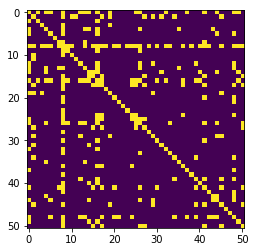

In [6]:
mrf_tot = (freqs>=.5).astype(int)
plt.imshow(mrf_tot)

In [7]:
#Check out off diagonal ones
ones = np.argwhere(mrf_tot)
for one in ones:
    if one[0] >= one[1]:
        continue
    #only get one triangle
    else:
        first = data_fill.columns[one[0]]
        second = data_fill.columns[one[1]]
        print('{}, {}'.format(first,second))

Alabama, Arizona
Alabama, California
Alabama, Colorado
Alabama, District of Columbia
Alabama, Idaho
Alabama, Illinois
Alabama, Indiana
Alabama, Kansas
Alabama, Maine
Alabama, Missouri
Alabama, Montana
Alabama, New York
Alabama, Oregon
Alabama, South Dakota
Alabama, Utah
Alabama, West Virginia
Alabama, Wisconsin
Alaska, District of Columbia
Alaska, Georgia
Alaska, Hawaii
Alaska, Kentucky
Alaska, Maine
Alaska, Nebraska
Alaska, New Hampshire
Alaska, New Mexico
Alaska, North Dakota
Alaska, Vermont
Arizona, Kansas
Arkansas, District of Columbia
Arkansas, Maine
California, District of Columbia
California, Illinois
California, Indiana
California, Kansas
California, Montana
California, Ohio
California, Texas
Colorado, District of Columbia
Colorado, Kansas
Colorado, Utah
Colorado, West Virginia
Delaware, District of Columbia
Delaware, Illinois
Delaware, South Dakota
District of Columbia, Florida
District of Columbia, Georgia
District of Columbia, Illinois
District of Columbia, Iowa
District of 

In [8]:
np.save('data/mrf.npy',mrf_tot)